In [10]:
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('heart(1).csv')
data = data.replace("",np.nan)
data = data.dropna()
data = data.drop_duplicates().reset_index(drop=True)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [127]:
# 1th question

In [11]:
z = np.abs(stats.zscore(data))
rows = np.where((z > 3) | (z < -3))[0].tolist()

data = data.drop(rows)
data.shape

(287, 14)

<AxesSubplot:>

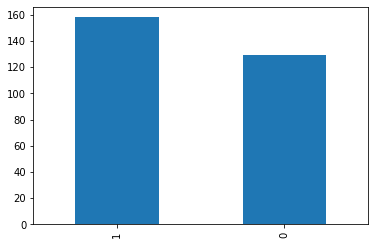

In [12]:
data['target'].value_counts().plot(kind = 'bar')

In [130]:
# 2th question

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['target'],axis=1),
                                                    data['target'], test_size=0.2, shuffle=True)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(229, 13) (58, 13) (229,) (58,)


In [132]:
# 4th question

In [15]:
from sklearn.metrics import classification_report

import numpy as np
import math

data2 = data[['chol','trestbps','thalach']]
X_train, X_test, y_train, y_test = train_test_split(data2,
                                                    data['target'], test_size=0.2, shuffle=True)

class gaussClf:
    def separate_by_classes(self, X, y):
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets
    
    def fit(self, X, y):
        separated_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
        
    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def predict_proba(self, X):
        self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(len(self.means)):
                self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
        return self.class_prob

    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

In [134]:
# 5th question

In [16]:
clf = gaussClf()
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

{0: 98, 1: 131}
              precision    recall  f1-score   support

           0       0.75      0.10      0.17        31
           1       0.48      0.96      0.64        27

    accuracy                           0.50        58
   macro avg       0.62      0.53      0.41        58
weighted avg       0.62      0.50      0.39        58



In [136]:
# 6th question

In [17]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        31
           1       0.65      0.81      0.72        27

    accuracy                           0.71        58
   macro avg       0.72      0.71      0.71        58
weighted avg       0.72      0.71      0.71        58



In [138]:
# 8th question

In [18]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.82      0.58      0.68        31
           1       0.64      0.85      0.73        27

    accuracy                           0.71        58
   macro avg       0.73      0.72      0.70        58
weighted avg       0.73      0.71      0.70        58



In [140]:
# 9th question

In [19]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear')
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.80      0.65      0.71        31
           1       0.67      0.81      0.73        27

    accuracy                           0.72        58
   macro avg       0.73      0.73      0.72        58
weighted avg       0.74      0.72      0.72        58



In [20]:
from sklearn.svm import SVC

clf = SVC(kernel = 'poly')
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.64      0.78      0.70        27

    accuracy                           0.69        58
   macro avg       0.70      0.70      0.69        58
weighted avg       0.70      0.69      0.69        58



In [143]:
# 10th question

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(data.drop(['target'],axis=1),
                                                    data['target'], test_size=0.2, shuffle=True)

clf = SVC(kernel = 'linear')
clf.fit(X_train.values,y_train.values)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.78      0.96      0.86        26

    accuracy                           0.86        58
   macro avg       0.87      0.87      0.86        58
weighted avg       0.88      0.86      0.86        58



In [145]:
# 11th question

In [23]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f"mean score: {scores.mean()}")
print(f"score std: {scores.std()}")

mean score: 0.8380676328502416
score std: 0.04456023563792447


In [147]:
# 12th question

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.56      0.77      0.65        26

    accuracy                           0.62        58
   macro avg       0.64      0.63      0.62        58
weighted avg       0.65      0.62      0.62        58



In [149]:
# 14th question

In [150]:
data2 = data[['chol','trestbps','thalach']]
X_train, X_test, y_train, y_test = train_test_split(data2,
                                                    data['target'], test_size=0.2, shuffle=True,random_state=42)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(classification_report(y_test.values,clf.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        23
           1       0.83      0.54      0.66        35

    accuracy                           0.66        58
   macro avg       0.68      0.68      0.66        58
weighted avg       0.71      0.66      0.66        58

